# Interpolate GPS track

<br/>
<div class="alert alert-block alert-warning">
    Les méthodes d'<b>interpolation</b> sont des méthodes qui sur-échantillonnent, sous-échantillonnent ou ré-échantillonnent les traces, elles passent donc nécessairement par une modélisation et une description complète de la trajectoire suivie. Lorsque la trace comporte des timestamps, on a alors suppression ou création de nouveaux timestamps. On peut donc considérer que ces méthodes <b>modifient les observations</b>, contrairement aux méthodes de lissage qui ne modifient que les géométries des observations. 
    
Il peut s'agir des méthodes locales (e.g. interpolation linéaire, bézier) ou globales (e.g. splines, krigeage, gaussian process...)

Ces méthodes ne sont sensées conserver les AF que pour un sous-échantillonnage strict. La porte d'entrée de base des méthodes d'interpolation dans Track est la fonction <b>resample</b>. 
</div>

## Let's start by defining our environment

This task is only useful for the online notebook

In [1]:
import matplotlib.pyplot as plt
import os
import sys

# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tracklib as tkl

### Construction de la trace

In [2]:
tkl.ObsTime.setReadFormat("4Y-2M-2D 2h:2m:2s")
trace = tkl.Track([], 1)
        
trace.addObs(tkl.Obs(tkl.ENUCoords(0.0,  0.0, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:00:00")))
trace.addObs(tkl.Obs(tkl.ENUCoords(1.0,  0.8, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:00:10")))
trace.addObs(tkl.Obs(tkl.ENUCoords(2.0,  0.9, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:00:20")))
trace.addObs(tkl.Obs(tkl.ENUCoords(3.0,  0.1, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:00:30")))
trace.addObs(tkl.Obs(tkl.ENUCoords(4.0, -0.7, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:00:35")))
trace.addObs(tkl.Obs(tkl.ENUCoords(5.0, -1.0, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:00:50")))
trace.addObs(tkl.Obs(tkl.ENUCoords(6.0, -0.2, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:00:59")))

SIZE = trace.size()

### Une fonction pour afficher la trace avec l'heure de passage

In [3]:
'''
Une fonction pour afficher la trace avec l'heure de passage
'''
def view_track(track, color='royalblue', sens='a'):
    #plt.figure(figsize=(8, 8))
    
    # Display point
    track.plotAsMarkers(frg = color, bkg = "w", sym_frg = r'$\bowtie$', sym_bkg = "o", size=6)
    track.plot(type='LINE', style='--', color=color)
    
    # Display time
    for i in range(track.size()):
        txt = str(track[i].timestamp.sec) + "'"
        if sens == 'a':
            delta = 0.15
        else:
            delta = -0.25
        plt.text(track[i].position.getX()-0.1, track[i].position.getY()+delta, txt, color=color)
    
    # Zoom
    plt.xlim([-0.5, 7.0])
    plt.ylim([-1.5, 2.0])
    
    #plt.show()


Longueur de la trace (en mètre):  7.171517602949423
Durée de la trace (en seconde):  59.0
Nombre de points:  7


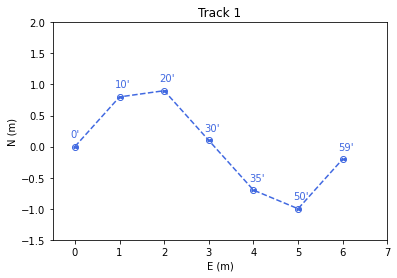

In [4]:
print ('')
print ("Longueur de la trace (en mètre): ", trace.length())
print ("Durée de la trace (en seconde): ", trace.duration())
print ("Nombre de points: ", trace.size())
view_track(trace)

### Resampling of a track with spatial linear interpolation

Oversampling with a factor 2, i.e. since the track has 7 points, it will have 2*7 points after resampling

Track lenght is 

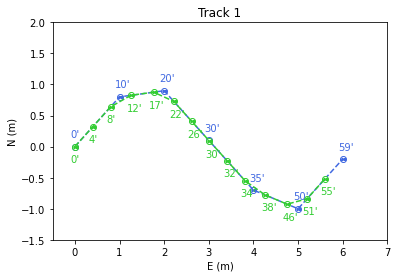

Espace entre chaque intervalle (en mètre):  0.5122512573535303
P0: 01/01/2018 10:00:00
P1: 01/01/2018 10:00:04 0.51
P2: 01/01/2018 10:00:08 0.51
P3: 01/01/2018 10:00:12 0.49
P4: 01/01/2018 10:00:12 0.51


In [5]:
trace1 = trace.copy()

FACTOR = 2
trace1.resample(factor=FACTOR, mode=tkl.MODE_SPATIAL) 

#trace.plot('k-')
view_track(trace)
#trace1.plot('r-')
#trace1.plot('ro')
view_track(trace1, color="limegreen", sens='b')
#plt.xlim([-0.5, 7.0])
#plt.ylim([-1.5, 1.5])
#plt.title('sur-échantillon spatial facteur ' + str(FACTOR))
plt.show()

print ("Espace entre chaque intervalle (en mètre): ", trace.length() / (FACTOR*SIZE))
print ('P0:', trace1[0].timestamp)
print ('P1:', trace1[1].timestamp, str(round(trace1[1].distanceTo(trace1[0]), 2)))
print ('P2:', trace1[2].timestamp, str(round(trace1[2].distanceTo(trace1[1]), 2)))
print ('P3:', trace1[3].timestamp, str(round(trace1[3].distanceTo(trace1[2]), 2)))
print ('P4:', trace1[3].timestamp, str(round(trace1[4].distanceTo(trace1[3]), 2)))

### Interpolation lineaire : sur-echantillonnage temporel facteur 2

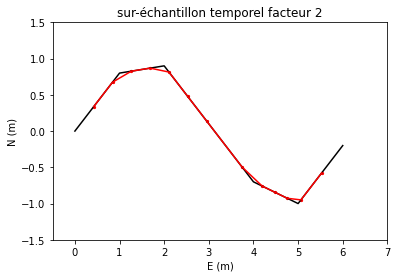

Durée entre chaque intervalle (en seconde):  4.214285714285714
P0: 01/01/2018 10:00:04
P1: 01/01/2018 10:00:08
P2: 01/01/2018 10:00:12
P3: 01/01/2018 10:00:16
P4: 01/01/2018 10:00:16


In [6]:
trace2 = trace.copy()

trace2.resample(factor=2, mode=tkl.MODE_TEMPORAL) 
trace.plot('k-')
trace2.plot('r-')
trace2.plot('ro')
plt.xlim([-0.5, 7.0])
plt.ylim([-1.5, 1.5])
plt.title('sur-échantillon temporel facteur 2')
plt.show()

print ("Durée entre chaque intervalle (en seconde): ", trace.duration() / (FACTOR*SIZE))
print ('P0:', trace2[0].timestamp)
print ('P1:', trace2[1].timestamp)
print ('P2:', trace2[2].timestamp)
print ('P3:', trace2[3].timestamp)
print ('P4:', trace2[3].timestamp)

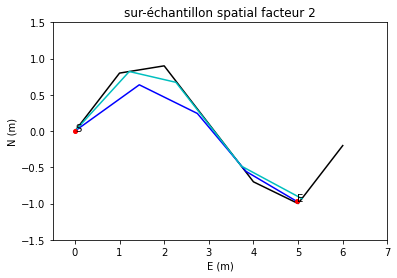

In [7]:
import tracklib
trace3 = trace.copy()
trace4 = trace.copy()

tracklib.algo.interpolation.GP_KERNEL = tkl.GaussianKernel(3)
trace3.resample(delta=1.5, mode=tkl.MODE_SPATIAL, algo=tkl.ALGO_GAUSSIAN_PROCESS)   

tracklib.algo.interpolation.GP_KERNEL = tkl.TriangularKernel(10)
trace4.resample(delta=1.5, mode=tkl.MODE_SPATIAL, algo=tkl.ALGO_GAUSSIAN_PROCESS)   

trace.plot('k-')
#trace1.plot('r-')
trace3.plot('b-')
trace4.plot('c-')
trace3.plotFirstObs(append=True)
trace3.plotLastObs(append=True)

plt.xlim([-0.5, 7.0])
plt.ylim([-1.5, 1.5])
plt.title('sur-échantillon spatial facteur 2')
plt.show()